In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import pickle
import pandas as pd
from tqdm import tqdm
import seaborn as sns

from graspy.plot import heatmap

from mgcpy.independence_tests.dcorr import DCorr
from mgcpy.independence_tests.rv_corr import RVCorr
from mgcpy.independence_tests.mgc import MGC

from simulations import rho_ER_marg, rho_sbm_marg, rho_sbm_diff_block
from utils import sbm_params, pearson_power, identity, to_distance_mtx, to_kernel

In [22]:
rho_arr = np.around(np.linspace(-0.3, 0.9, 14), 1)
P1 = sbm_params(a=0.7, b=0.4)
P2 = sbm_params(a=0.8, b=0.3)
k = 2
n = 100
mc = 500
sbm_ts_dict1 = {'pearson': np.zeros((rho_arr.size, mc)),
          'dcorr': np.zeros((rho_arr.size, mc))}
test_names = ['pearson', 'dcorr']

for name in test_names:
    if name == 'pearson':
        indept_test = RVCorr(which_test='pearson')
    elif name == 'dcorr':
        indept_test = DCorr(compute_distance_matrix=identity)
    for i, rho in tqdm(enumerate(rho_arr)):
        for j in range(mc):
            A, B = rho_sbm_marg(rho=rho, AL=P1, BL=P2, k=k, n=n)
            test_stat_alt, _ = indept_test.test_statistic(
                matrix_X=to_distance_mtx(A),
                matrix_Y=to_distance_mtx(B))
            sbm_ts_dict1[name][i, j] = test_stat_alt


0it [00:00, ?it/s]
1it [00:03,  3.83s/it]
2it [00:07,  3.72s/it]
3it [00:10,  3.64s/it]
4it [00:14,  3.56s/it]
5it [00:17,  3.53s/it]
6it [00:21,  3.52s/it]
7it [00:24,  3.51s/it]
8it [00:28,  3.50s/it]
9it [00:31,  3.51s/it]
10it [00:35,  3.50s/it]
11it [00:38,  3.48s/it]
12it [00:41,  3.49s/it]

ValueError: the largest valid rho for the specified AL and BL is 0.7637626158259732. Please specify a rho that is smaller than the largest valid rho.

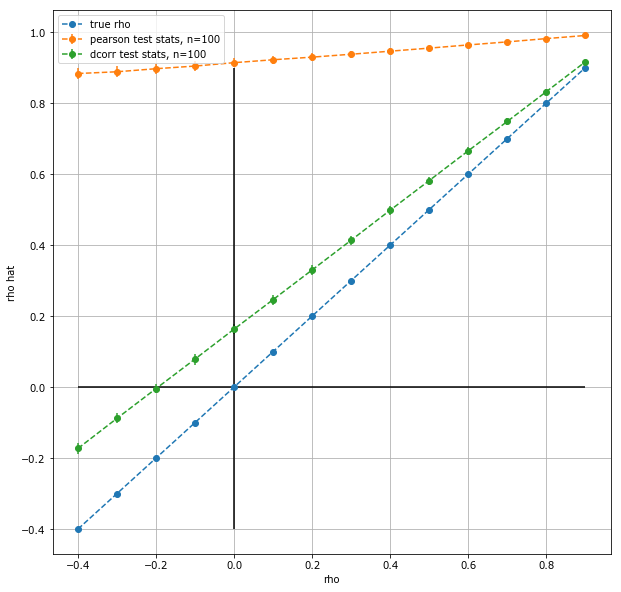

In [3]:
plt.figure(figsize=(10,10))
plt.plot(rho_arr, rho_arr, label='true rho', marker='o', linestyle='--')
test_names = ['pearson', 'dcorr']
for name in test_names:
    plt.errorbar(rho_arr, np.mean(sbm_ts_dict1[name], axis=1), yerr=np.std(sbm_ts_dict1[name], axis=1),
             marker='o', linestyle='--', label='{} test stats, n=100'.format(name))

plt.hlines(y=0, xmin=np.amin(rho_arr), xmax=np.amax(rho_arr))
plt.vlines(x=0, ymin=np.amin(rho_arr), ymax=np.amax(rho_arr))
plt.grid()
plt.xlabel('rho')
plt.ylabel('rho hat')
plt.legend()

In [4]:
rho_arr = np.around(np.linspace(-0.6, 0.3, 10), 1)
P1 = sbm_params(a=0.7, b=0.3)
P2 = sbm_params(a=0.2, b=0.5)
k = 2
n = 100
mc = 500
sbm_marg_ts_dict = {'pearson': np.zeros((rho_arr.size, mc)),
          'dcorr': np.zeros((rho_arr.size, mc))}
test_names = ['pearson', 'dcorr']

for name in test_names:
    if name == 'pearson':
        indept_test = RVCorr(which_test='pearson')
    elif name == 'dcorr':
        indept_test = DCorr(compute_distance_matrix=identity)
    for i, rho in tqdm(enumerate(rho_arr)):
        for j in range(mc):
            A, B = rho_sbm_marg(rho=rho, AL=P1, BL=P2, k=k, n=n)
            test_stat_alt, _ = indept_test.test_statistic(
                matrix_X=to_distance_mtx(A),
                matrix_Y=to_distance_mtx(B))
            sbm_marg_ts_dict[name][i, j] = test_stat_alt

10it [00:31,  3.14s/it]
10it [00:12,  1.29s/it]


In [19]:
rho_ER_marg(rho=-0.9, p=.5, q=.5)

(array([[1., 0., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 1., 1.],
        [1., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 1., 0.],
        [0., 1., 0., ..., 1., 0., 0.],
        [0., 1., 0., ..., 0., 0., 1.]]), array([[0., 1., 0., ..., 1., 1., 1.],
        [1., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 0., 0., 1.],
        [1., 0., 1., ..., 0., 1., 1.],
        [1., 0., 1., ..., 1., 1., 0.]]))

In [6]:
rho_arr = np.around(np.linspace(-0.4, 0.9, 14), 1)
p = 0.5
q = 0.5
n = 100
mc = 500
er_dict = {'pearson': np.zeros((rho_arr.size, mc)),
          'dcorr': np.zeros((rho_arr.size, mc))}
test_names = ['pearson', 'dcorr']

for name in test_names:
    if name == 'pearson':
        indept_test = RVCorr(which_test='pearson')
    elif name == 'dcorr':
        indept_test = DCorr(compute_distance_matrix=identity)
    for i, rho in tqdm(enumerate(rho_arr)):
        for j in range(mc):
            A, B = rho_ER_marg(rho=rho, p=p, q=q, n=n)
            test_stat_alt, _ = indept_test.test_statistic(
                matrix_X=to_distance_mtx(A),
                matrix_Y=to_distance_mtx(B))
            er_dict[name][i, j] = test_stat_alt

14it [00:56,  4.06s/it]
14it [00:16,  1.27s/it]


In [8]:
rho_arr = np.around(np.linspace(-0.4, 0.3, 8), 1)
p = 0.7
q = 0.2
n = 100
mc = 500
er_marg_dict = {'pearson': np.zeros((rho_arr.size, mc)),
          'dcorr': np.zeros((rho_arr.size, mc))}
test_names = ['pearson', 'dcorr']

for name in test_names:
    if name == 'pearson':
        indept_test = RVCorr(which_test='pearson')
    elif name == 'dcorr':
        indept_test = DCorr(compute_distance_matrix=identity)
    for i, rho in tqdm(enumerate(rho_arr)):
        for j in range(mc):
            A, B = rho_ER_marg(rho=rho, p=p, q=q, n=n)
            test_stat_alt, _ = indept_test.test_statistic(
                matrix_X=to_distance_mtx(A),
                matrix_Y=to_distance_mtx(B))
            er_marg_dict[name][i, j] = test_stat_alt


0it [00:00, ?it/s]
1it [00:03,  3.92s/it]
2it [00:08,  3.98s/it]
3it [00:12,  4.05s/it]
4it [00:17,  4.28s/it]
5it [00:21,  4.28s/it]
6it [00:25,  4.22s/it]
7it [00:29,  4.08s/it]
8it [00:32,  3.98s/it]
0it [00:00, ?it/s]
1it [00:01,  1.09s/it]
2it [00:02,  1.09s/it]
3it [00:03,  1.11s/it]
4it [00:04,  1.11s/it]
5it [00:05,  1.10s/it]
6it [00:06,  1.11s/it]
7it [00:07,  1.11s/it]
8it [00:08,  1.11s/it]

In [15]:
with open('../../results/rho_sbm_marg_teststats.pkl', 'wb') as f:
    pickle.dump(sbm_marg_ts_dict, f)

In [6]:
def new_distance(A):
    distance_mtx_A = 1 - (A / np.max(A))
    return distance_mtx_A

In [7]:
def kernel1(A):
    D_vec = np.sum(A, axis=0)
    with np.errstate(divide="ignore"):
        D_root = 1 / np.sqrt(D_vec)  # this is 10x faster than ** -0.5
    D_root[np.isinf(D_root)] = 0
    D_root = np.diag(D_root)  # just change to sparse diag for sparse support
    I = np.identity(A.shape[0])
    K = I - D_root @ A @ D_root
    return K

In [8]:
rho_arr = np.around(np.linspace(0, 0.5, 5), 1)
P1 = np.array([[0.4, 0.1],[0.1, 0.05]])
P2 = np.array([[0.4, 0.1],[0.1, 0.05]])
k = 2
n = 100
mc = 500
indept_test = DCorr(compute_distance_matrix=identity)
dcorr_ts1 = np.zeros((rho_arr.shape[0], mc))

for i, rho in tqdm(enumerate(rho_arr)):
    for j in range(mc):
        A, B = rho_sbm_marg(rho=rho, AL=P1, BL=P2, k=k, n=n)
        test_stat_alt, _ = indept_test.test_statistic(
            matrix_X=new_distance(A),
            matrix_Y=new_distance(B))
        dcorr_ts1[i, j] = test_stat_alt

dcorr_ts2 = np.zeros((rho_arr.shape[0], mc))

for i, rho in tqdm(enumerate(rho_arr)):
    for j in range(mc):
        A, B = rho_sbm_marg(rho=rho, AL=P1, BL=P2, k=k, n=n)
        test_stat_alt, _ = indept_test.test_statistic(
            matrix_X=new_distance(to_kernel(A)),
            matrix_Y=new_distance(to_kernel(B)))
        dcorr_ts2[i, j] = test_stat_alt

dcorr_ts3 = np.zeros((rho_arr.shape[0], mc))

for i, rho in tqdm(enumerate(rho_arr)):
    for j in range(mc):
        A, B = rho_sbm_marg(rho=rho, AL=P1, BL=P2, k=k, n=n)
        test_stat_alt, _ = indept_test.test_statistic(
            matrix_X=new_distance(kernel1(A)),
            matrix_Y=new_distance(kernel1(B)))
        dcorr_ts3[i, j] = test_stat_alt

dcorr_ts4 = np.zeros((rho_arr.shape[0], mc))

for i, rho in tqdm(enumerate(rho_arr)):
    for j in range(mc):
        A, B = rho_sbm_marg(rho=rho, AL=P1, BL=P2, k=k, n=n)
        test_stat_alt, _ = indept_test.test_statistic(
            matrix_X=np.sqrt(new_distance(kernel1(A))),
            matrix_Y=np.sqrt(new_distance(kernel1(B))))
        dcorr_ts4[i, j] = test_stat_alt

5it [00:05,  1.16s/it]
5it [00:06,  1.38s/it]
5it [00:06,  1.23s/it]
5it [00:06,  1.25s/it]


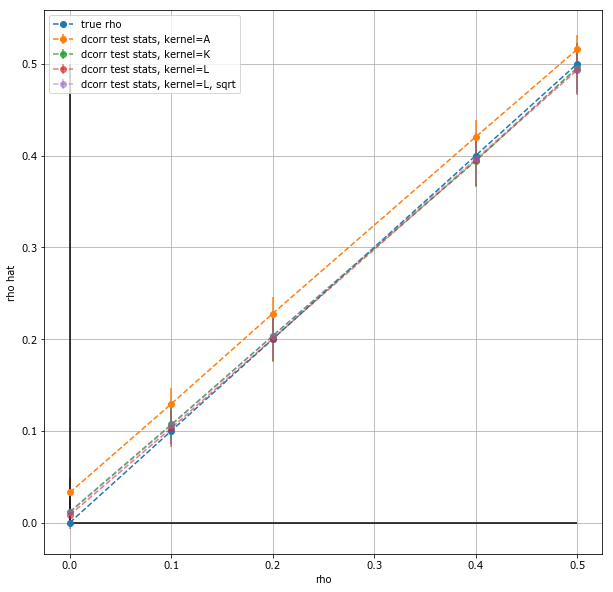

In [9]:
plt.figure(figsize=(10,10))
plt.plot(rho_arr, rho_arr, label='true rho', marker='o', linestyle='--')
plt.errorbar(rho_arr, np.mean(dcorr_ts1, axis=1), yerr=np.std(dcorr_ts1, axis=1),
            marker='o', linestyle='--', label='dcorr test stats, kernel=A')
plt.errorbar(rho_arr, np.mean(dcorr_ts2, axis=1), yerr=np.std(dcorr_ts2, axis=1),
            marker='o', linestyle='--', label='dcorr test stats, kernel=K', alpha=0.8)
plt.errorbar(rho_arr, np.mean(dcorr_ts3, axis=1), yerr=np.std(dcorr_ts3, axis=1),
            marker='o', linestyle='--', label='dcorr test stats, kernel=L', alpha=0.6)
plt.errorbar(rho_arr, np.mean(dcorr_ts4, axis=1), yerr=np.std(dcorr_ts4, axis=1),
            marker='o', linestyle='--', label='dcorr test stats, kernel=L, sqrt', alpha=0.5)

plt.hlines(y=0, xmin=np.amin(rho_arr), xmax=np.amax(rho_arr))
plt.vlines(x=0, ymin=np.amin(rho_arr), ymax=np.amax(rho_arr))
plt.grid()
plt.xlabel('rho')
plt.ylabel('rho hat')
plt.legend()

In [10]:
rho_arr = np.around(np.linspace(-0.6, 0.3, 10), 1)
P1 = sbm_params(a=0.7, b=0.3)
P2 = sbm_params(a=0.2, b=0.5)
k = 2
n = 100
mc = 500
indept_test = DCorr(compute_distance_matrix=identity)
dcorr_ts1 = np.zeros((rho_arr.shape[0], mc))

for i, rho in tqdm(enumerate(rho_arr)):
    for j in range(mc):
        A, B = rho_sbm_marg(rho=rho, AL=P1, BL=P2, k=k, n=n)
        test_stat_alt, _ = indept_test.test_statistic(
            matrix_X=new_distance(A),
            matrix_Y=new_distance(B))
        dcorr_ts1[i, j] = test_stat_alt

dcorr_ts2 = np.zeros((rho_arr.shape[0], mc))

for i, rho in tqdm(enumerate(rho_arr)):
    for j in range(mc):
        A, B = rho_sbm_marg(rho=rho, AL=P1, BL=P2, k=k, n=n)
        test_stat_alt, _ = indept_test.test_statistic(
            matrix_X=new_distance(to_kernel(A)),
            matrix_Y=new_distance(to_kernel(B)))
        dcorr_ts2[i, j] = test_stat_alt

dcorr_ts3 = np.zeros((rho_arr.shape[0], mc))

for i, rho in tqdm(enumerate(rho_arr)):
    for j in range(mc):
        A, B = rho_sbm_marg(rho=rho, AL=P1, BL=P2, k=k, n=n)
        test_stat_alt, _ = indept_test.test_statistic(
            matrix_X=new_distance(kernel1(A)),
            matrix_Y=new_distance(kernel1(B)))
        dcorr_ts3[i, j] = test_stat_alt

dcorr_ts4 = np.zeros((rho_arr.shape[0], mc))

for i, rho in tqdm(enumerate(rho_arr)):
    for j in range(mc):
        A, B = rho_sbm_marg(rho=rho, AL=P1, BL=P2, k=k, n=n)
        test_stat_alt, _ = indept_test.test_statistic(
            matrix_X=np.sqrt(new_distance(kernel1(A))),
            matrix_Y=np.sqrt(new_distance(kernel1(B))))
        dcorr_ts4[i, j] = test_stat_alt

10it [00:12,  1.24s/it]
10it [00:14,  1.49s/it]
10it [00:14,  1.40s/it]
10it [00:14,  1.38s/it]


In [45]:
dcorr_ts5 = np.zeros((rho_arr.shape[0], mc))

for i, rho in tqdm(enumerate(rho_arr)):
    for j in range(mc):
        A, B = rho_sbm_marg(rho=rho, AL=P1, BL=P2, k=k, n=500)
        test_stat_alt, _ = indept_test.test_statistic(
            matrix_X=new_distance(A),
            matrix_Y=new_distance(B))
        dcorr_ts5[i, j] = test_stat_alt

10it [03:44, 22.45s/it]


In [51]:
dcorr_ts6 = np.zeros((rho_arr.shape[0], mc))

for i, rho in tqdm(enumerate(rho_arr)):
    for j in range(mc):
        A, B = rho_ER_marg(rho=rho, p=0.7, q=0.3, n=100)
        test_stat_alt, _ = indept_test.test_statistic(
            matrix_X=new_distance(A),
            matrix_Y=new_distance(B))
        dcorr_ts6[i, j] = test_stat_alt


0it [00:00, ?it/s]
1it [00:01,  1.18s/it]
2it [00:02,  1.16s/it]
3it [00:03,  1.13s/it]
4it [00:04,  1.12s/it]
5it [00:05,  1.12s/it]
6it [00:06,  1.15s/it]
7it [00:07,  1.12s/it]
8it [00:09,  1.14s/it]
9it [00:10,  1.15s/it]
10it [00:11,  1.16s/it]

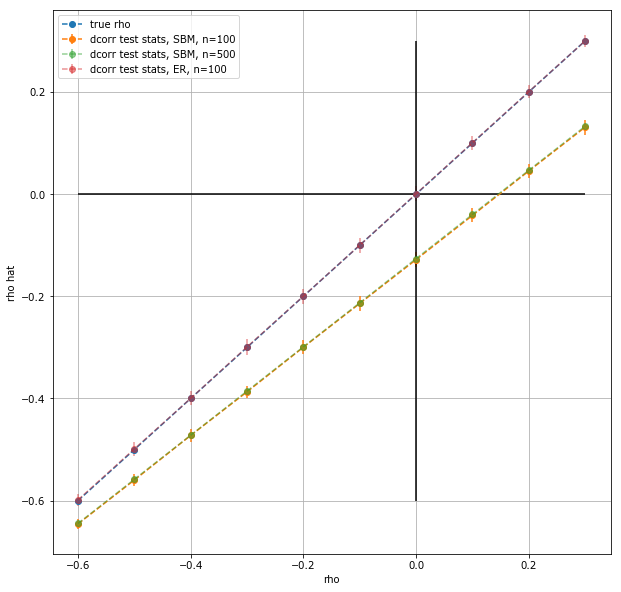

In [52]:
plt.figure(figsize=(10,10))
plt.plot(rho_arr, rho_arr, label='true rho', marker='o', linestyle='--')
plt.errorbar(rho_arr, np.mean(dcorr_ts1, axis=1), yerr=np.std(dcorr_ts1, axis=1),
            marker='o', linestyle='--', label='dcorr test stats, SBM, n=100')
plt.errorbar(rho_arr, np.mean(dcorr_ts5, axis=1), yerr=np.std(dcorr_ts5, axis=1),
            marker='o', linestyle='--', label='dcorr test stats, SBM, n=500', alpha=0.5)
plt.errorbar(rho_arr, np.mean(dcorr_ts6, axis=1), yerr=np.std(dcorr_ts6, axis=1),
            marker='o', linestyle='--', label='dcorr test stats, ER, n=100', alpha=0.5)

plt.hlines(y=0, xmin=np.amin(rho_arr), xmax=np.amax(rho_arr))
plt.vlines(x=0, ymin=np.amin(rho_arr), ymax=np.amax(rho_arr))
plt.grid()
plt.xlabel('rho')
plt.ylabel('rho hat')
plt.legend()

In [34]:
from scipy.sparse.linalg import arpack
def isPSD(A, tol = 1e-8):
    vals, vecs = arpack.eigsh(A, k = 2, which = 'BE') # return the ends of spectrum of A
    return np.all(vals > -tol)

In [37]:
indept_test = DCorr(compute_distance_matrix=identity, which_test='unbiased')
A, B = rho_sbm_marg(rho=-0.5, AL=P1, BL=P2, k=k, n=n)
k1 = kernel1(A)
k2 = kernel1(B)
#k1 = to_kernel(A)
#k2 = to_kernel(B)
d1 = new_distance(k1)
d2 = new_distance(k2)
test_stat_alt, _ = indept_test.test_statistic(
    matrix_X=d1,
    matrix_Y=d2)

In [42]:
test_stat_alt

-0.5714586243752273